# DLV Group Project

In [2]:
 # General imports
import tensorflow as tf
tf.compat.v1.enable_eager_execution(
    config=None, device_policy=None, execution_mode=None
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, datetime
# Shortcuts to keras if (however from tensorflow)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard 

# Shortcut for displaying images
def plot_img(img):
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.show()

In [3]:
!unzip "/content/2020-02-14_InfraredSolarModules.zip"

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: InfraredSolarModules/images/2121.jpg  
  inflating: InfraredSolarModules/images/11778.jpg  
  inflating: InfraredSolarModules/images/5896.jpg  
  inflating: InfraredSolarModules/images/4550.jpg  
  inflating: InfraredSolarModules/images/19324.jpg  
  inflating: InfraredSolarModules/images/16017.jpg  
  inflating: InfraredSolarModules/images/10472.jpg  
  inflating: InfraredSolarModules/images/2135.jpg  
  inflating: InfraredSolarModules/images/4.jpg  
  inflating: InfraredSolarModules/images/5882.jpg  
  inflating: InfraredSolarModules/images/19330.jpg  
  inflating: InfraredSolarModules/images/4544.jpg  
  inflating: InfraredSolarModules/images/16003.jpg  
  inflating: InfraredSolarModules/images/12265.jpg  
  inflating: InfraredSolarModules/images/9060.jpg  
  inflating: InfraredSolarModules/images/14614.jpg  
  inflating: InfraredSolarModules/images/6353.jpg  
  inflating: InfraredSolarModules/images/970

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_json("/content/InfraredSolarModules/module_metadata.json",orient="index")
df

,image_filepath,anomaly_class
13357,images/13357.jpg,No-Anomaly
13356,images/13356.jpg,No-Anomaly
19719,images/19719.jpg,No-Anomaly
11542,images/11542.jpg,No-Anomaly
11543,images/11543.jpg,No-Anomaly
...,...,...
8488,images/8488.jpg,Vegetation
8489,images/8489.jpg,Vegetation
7464,images/7464.jpg,Cracking
18065,images/18065.jpg,No-Anomaly


In [5]:
df['image_name'] = df['image_filepath'].str[7:]
df

,image_filepath,anomaly_class,image_name
13357,images/13357.jpg,No-Anomaly,13357.jpg
13356,images/13356.jpg,No-Anomaly,13356.jpg
19719,images/19719.jpg,No-Anomaly,19719.jpg
11542,images/11542.jpg,No-Anomaly,11542.jpg
11543,images/11543.jpg,No-Anomaly,11543.jpg
...,...,...,...
8488,images/8488.jpg,Vegetation,8488.jpg
8489,images/8489.jpg,Vegetation,8489.jpg
7464,images/7464.jpg,Cracking,7464.jpg
18065,images/18065.jpg,No-Anomaly,18065.jpg


In [6]:
reduced_df=df.sample(frac=0.8,random_state=200) # random state is a seed value
train_df=reduced_df.sample(frac=0.8,random_state=200) # random state is a seed value
validation_test_df=reduced_df.drop(train_df.index)
validation_df=validation_test_df.sample(frac=0.5,random_state=200)
test_df=validation_test_df.drop(validation_df.index)
print(train_df.info())
print(validation_df.info())
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12800 entries, 19208 to 2880
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_filepath  12800 non-null  object
 1   anomaly_class   12800 non-null  object
 2   image_name      12800 non-null  object
dtypes: object(3)
memory usage: 400.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 12389 to 2391
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_filepath  1600 non-null   object
 1   anomaly_class   1600 non-null   object
 2   image_name      1600 non-null   object
dtypes: object(3)
memory usage: 50.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 2358 to 14124
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_filepath  1600 non-null   object
 1  

In [ ]:
image_height = 40
image_width = 24
batch_size = 32

datagen_train=ImageDataGenerator(rescale=1./255)
datagen_validation=ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_dataframe(
    dataframe = train_df,
    directory = "/content/InfraredSolarModules/images/",
    x_col = "image_name",
    y_col = "anomaly_class",
    class_mode = "categorical",
    target_size = (image_height, image_width),
    batch_size = batch_size,
    color_mode = "grayscale"
)

validation_generator = datagen_train.flow_from_dataframe(
    dataframe = validation_df,
    directory = "/content/InfraredSolarModules/images/",
    x_col = "image_name",
    y_col = "anomaly_class",
    class_mode = "categorical",
    target_size = (image_height, image_width),
    batch_size = batch_size,
     color_mode = "grayscale"
)

In [20]:
image_height = 40
image_width = 24
num_classes = 12

model_0 = Sequential()
model_0.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=(image_height, image_width, 1)))
model_0.add(Activation('relu'))
model_0.add(MaxPooling2D(pool_size= (2,2)))

model_0.add(Conv2D(filters = 64, kernel_size=(3,3)))
model_0.add(Activation('relu'))
model_0.add(MaxPooling2D(pool_size = (2,2)))

model_0.add(Conv2D(filters = 128, kernel_size=(3,3)))
model_0.add(Activation('relu'))
model_0.add(MaxPooling2D(pool_size = (2,2)))

model_0.add(Flatten()) 
model_0.add(Dense(num_classes))
model_0.add(Activation('softmax'))

model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(1e-3),
              metrics=['accuracy'])
model_0.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 38, 22, 32)        320       
                                                                 
 activation_29 (Activation)  (None, 38, 22, 32)        0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 19, 11, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 17, 9, 64)         18496     
                                                                 
 activation_30 (Activation)  (None, 17, 9, 64)         0         
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 8, 4, 64)         0         
 g2D)                                                 

In [18]:
batch_size = 64
datagen_train=ImageDataGenerator(rescale=1./255)
datagen_validation=ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_dataframe(
    dataframe = train_df,
    directory = "/content/InfraredSolarModules/images/",
    x_col = "image_name",
    y_col = "anomaly_class",
    class_mode = "categorical",
    target_size = (image_height, image_width),
    batch_size = batch_size,
    color_mode = "grayscale"
)

validation_generator = datagen_train.flow_from_dataframe(
    dataframe = validation_df,
    directory = "/content/InfraredSolarModules/images/",
    x_col = "image_name",
    y_col = "anomaly_class",
    class_mode = "categorical",
    target_size = (image_height, image_width),
    batch_size = batch_size,
     color_mode = "grayscale"
)

Found 12800 validated image filenames belonging to 12 classes.
Found 1600 validated image filenames belonging to 12 classes.


In [21]:
history_0 = model_0.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator
 )

Epoch 1/100
200/200 [==============================] - 15s 23ms/step - loss: 1.8264 - accuracy: 0.5006 - val_loss: 1.7970 - val_accuracy: 0.4856
Epoch 2/100
200/200 [==============================] - 4s 18ms/step - loss: 1.7533 - accuracy: 0.5026 - val_loss: 1.8244 - val_accuracy: 0.4856
Epoch 3/100
200/200 [==============================] - 4s 18ms/step - loss: 1.7341 - accuracy: 0.5026 - val_loss: 1.7456 - val_accuracy: 0.4856
Epoch 4/100
200/200 [==============================] - 4s 18ms/step - loss: 1.7036 - accuracy: 0.5029 - val_loss: 1.7070 - val_accuracy: 0.4869
Epoch 5/100
200/200 [==============================] - 4s 18ms/step - loss: 1.6461 - accuracy: 0.5088 - val_loss: 1.6171 - val_accuracy: 0.5013
Epoch 6/100
200/200 [==============================] - 4s 18ms/step - loss: 1.5692 - accuracy: 0.5309 - val_loss: 1.7350 - val_accuracy: 0.5019
Epoch 7/100
200/200 [==============================] - 4s 18ms/step - loss: 1.4947 - accuracy: 0.5566 - val_loss: 1.6645 - val_accuracy

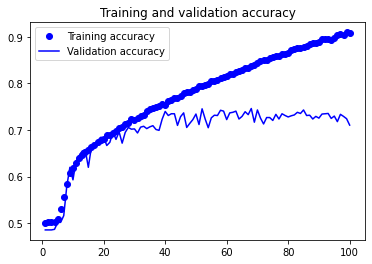

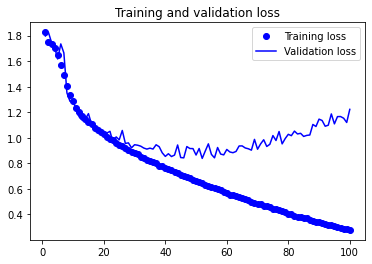

In [22]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [23]:
model_0.evaluate(validation_generator)

25/25 [==============================] - 1s 27ms/step - loss: 1.2226 - accuracy: 0.7106


[1.222572922706604, 0.7106249928474426]

In [24]:
batch_size = 32
image_height = 40
image_width = 24
num_train_images = 12800
num_valid_images = 1600
num_classes = 12

model_1 = Sequential()
model_1.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=(image_height, image_width, 1)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size= (2,2)))

model_1.add(Conv2D(filters = 64, kernel_size=(3,3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))

model_1.add(Conv2D(filters = 64, kernel_size=(3,3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))

model_1.add(Flatten()) 
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(1e-3),
              metrics=['accuracy'])
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 38, 22, 32)        320       
                                                                 
 activation_33 (Activation)  (None, 38, 22, 32)        0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 19, 11, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 17, 9, 64)         18496     
                                                                 
 activation_34 (Activation)  (None, 17, 9, 64)         0         
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 8, 4, 64)         0         
 g2D)                                                

In [25]:
history_1 = model_1.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator
 )

Epoch 1/100
200/200 [==============================] - 4s 17ms/step - loss: 1.8296 - accuracy: 0.5005 - val_loss: 1.8070 - val_accuracy: 0.4856
Epoch 2/100
200/200 [==============================] - 3s 17ms/step - loss: 1.7590 - accuracy: 0.5026 - val_loss: 1.8262 - val_accuracy: 0.4856
Epoch 3/100
200/200 [==============================] - 3s 17ms/step - loss: 1.7433 - accuracy: 0.5026 - val_loss: 1.8198 - val_accuracy: 0.4856
Epoch 4/100
200/200 [==============================] - 3s 17ms/step - loss: 1.7245 - accuracy: 0.5026 - val_loss: 1.7867 - val_accuracy: 0.4875
Epoch 5/100
200/200 [==============================] - 3s 17ms/step - loss: 1.6912 - accuracy: 0.5014 - val_loss: 1.7189 - val_accuracy: 0.4863
Epoch 6/100
200/200 [==============================] - 3s 16ms/step - loss: 1.6365 - accuracy: 0.5103 - val_loss: 1.6718 - val_accuracy: 0.4956
Epoch 7/100
200/200 [==============================] - 3s 16ms/step - loss: 1.5683 - accuracy: 0.5304 - val_loss: 1.4899 - val_accuracy:

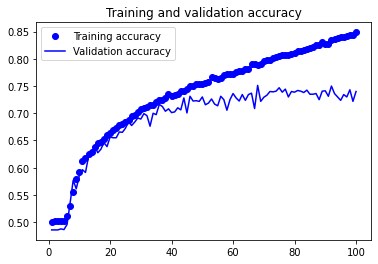

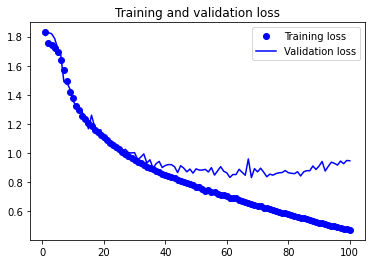

In [26]:
accuracy = history_1.history["accuracy"]
val_accuracy = history_1.history["val_accuracy"]
loss = history_1.history["loss"]
val_loss = history_1.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [27]:
model_1.evaluate(validation_generator)

25/25 [==============================] - 1s 19ms/step - loss: 0.9471 - accuracy: 0.7400


[0.9471312761306763, 0.7400000095367432]

In [28]:
batch_size = 32
image_height = 40
image_width = 24
num_train_images = 12800
num_valid_images = 1600
num_classes = 12

model_2 = Sequential()
model_2.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=(image_height, image_width, 1)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size= (2,2)))

model_2.add(Conv2D(filters = 64, kernel_size=(3,3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size = (2,2)))

model_2.add(Conv2D(filters = 64, kernel_size=(3,3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size = (2,2)))

model_2.add(Flatten()) 
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(1e-3),
              metrics=['accuracy'])
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 38, 22, 32)        320       
                                                                 
 activation_37 (Activation)  (None, 38, 22, 32)        0         
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 19, 11, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 17, 9, 64)         18496     
                                                                 
 activation_38 (Activation)  (None, 17, 9, 64)         0         
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 8, 4, 64)         0         
 g2D)                                                

In [29]:
history_2 = model_2.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator
 )

Epoch 1/100
200/200 [==============================] - 4s 17ms/step - loss: 1.8717 - accuracy: 0.4994 - val_loss: 1.7997 - val_accuracy: 0.4856
Epoch 2/100
200/200 [==============================] - 3s 16ms/step - loss: 1.7912 - accuracy: 0.5026 - val_loss: 1.8071 - val_accuracy: 0.4856
Epoch 3/100
200/200 [==============================] - 3s 16ms/step - loss: 1.7624 - accuracy: 0.5026 - val_loss: 1.7767 - val_accuracy: 0.4856
Epoch 4/100
200/200 [==============================] - 3s 16ms/step - loss: 1.7484 - accuracy: 0.5026 - val_loss: 1.7604 - val_accuracy: 0.4856
Epoch 5/100
200/200 [==============================] - 4s 21ms/step - loss: 1.7285 - accuracy: 0.4998 - val_loss: 1.7093 - val_accuracy: 0.4869
Epoch 6/100
200/200 [==============================] - 3s 16ms/step - loss: 1.6949 - accuracy: 0.5049 - val_loss: 1.6446 - val_accuracy: 0.5063
Epoch 7/100
200/200 [==============================] - 3s 17ms/step - loss: 1.6545 - accuracy: 0.5160 - val_loss: 1.6516 - val_accuracy:

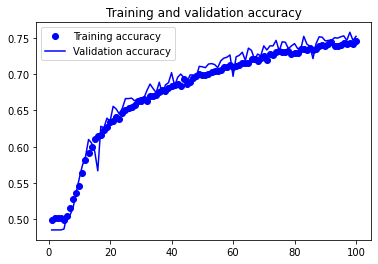

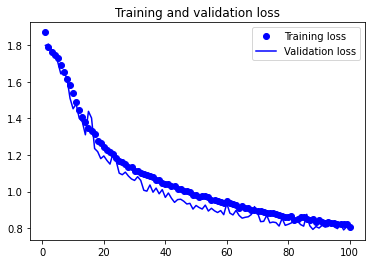

In [30]:
accuracy = history_2.history["accuracy"]
val_accuracy = history_2.history["val_accuracy"]
loss = history_2.history["loss"]
val_loss = history_2.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [34]:
batch_size = 32
image_height = 40
image_width = 24
num_train_images = 12800
num_valid_images = 1600
num_classes = 12

model_3 = Sequential()
model_3.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=(image_height, image_width, 1)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size= (2,2)))

model_3.add(Conv2D(filters = 64, kernel_size=(3,3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size = (2,2)))

model_3.add(Conv2D(filters = 64, kernel_size=(3,3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size = (2,2)))

model_3.add(Flatten()) 
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(1e-3),
              metrics=['accuracy'])
model_3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 38, 22, 32)        320       
                                                                 
 activation_45 (Activation)  (None, 38, 22, 32)        0         
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 19, 11, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 17, 9, 64)         18496     
                                                                 
 activation_46 (Activation)  (None, 17, 9, 64)         0         
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 8, 4, 64)         0         
 g2D)                                                

In [35]:
history_3 = model_3.fit(
    train_generator,
    epochs = 200,
    validation_data = validation_generator
 )

Epoch 1/200
200/200 [==============================] - 4s 17ms/step - loss: 1.8641 - accuracy: 0.4985 - val_loss: 1.8018 - val_accuracy: 0.4856
Epoch 2/200
200/200 [==============================] - 3s 16ms/step - loss: 1.7842 - accuracy: 0.5026 - val_loss: 1.7886 - val_accuracy: 0.4856
Epoch 3/200
200/200 [==============================] - 3s 17ms/step - loss: 1.7580 - accuracy: 0.5026 - val_loss: 1.7754 - val_accuracy: 0.4856
Epoch 4/200
200/200 [==============================] - 4s 21ms/step - loss: 1.7502 - accuracy: 0.5025 - val_loss: 1.8172 - val_accuracy: 0.4856
Epoch 5/200
200/200 [==============================] - 3s 17ms/step - loss: 1.7358 - accuracy: 0.5020 - val_loss: 1.7400 - val_accuracy: 0.4856
Epoch 6/200
200/200 [==============================] - 3s 17ms/step - loss: 1.7112 - accuracy: 0.5023 - val_loss: 1.7178 - val_accuracy: 0.5013
Epoch 7/200
200/200 [==============================] - 3s 17ms/step - loss: 1.6789 - accuracy: 0.5060 - val_loss: 1.6716 - val_accuracy:

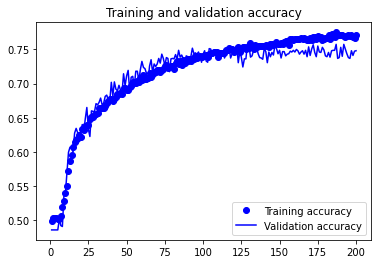

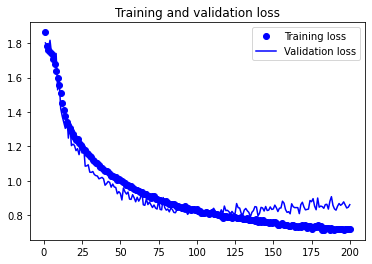

In [36]:
accuracy = history_3.history["accuracy"]
val_accuracy = history_3.history["val_accuracy"]
loss = history_3.history["loss"]
val_loss = history_3.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [37]:
image_height = 40
image_width = 24
num_classes = 12

model_4 = Sequential()
model_4.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=(image_height, image_width, 1)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size= (2,2)))

model_4.add(Conv2D(filters = 64, kernel_size=(3,3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size = (2,2)))

model_4.add(Conv2D(filters = 64, kernel_size=(3,3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size = (2,2)))

model_4.add(Flatten()) 
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))

model_4.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(1e-4),
              metrics=['accuracy'])
model_4.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 38, 22, 32)        320       
                                                                 
 activation_49 (Activation)  (None, 38, 22, 32)        0         
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 19, 11, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 17, 9, 64)         18496     
                                                                 
 activation_50 (Activation)  (None, 17, 9, 64)         0         
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 8, 4, 64)         0         
 g2D)                                                

In [39]:
history_4 = model_4.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator
 )

Epoch 1/100
200/200 [==============================] - 4s 20ms/step - loss: 2.0417 - accuracy: 0.4834 - val_loss: 1.8986 - val_accuracy: 0.4856
Epoch 2/100
200/200 [==============================] - 4s 18ms/step - loss: 1.9060 - accuracy: 0.5020 - val_loss: 1.8731 - val_accuracy: 0.4856
Epoch 3/100
200/200 [==============================] - 3s 16ms/step - loss: 1.8727 - accuracy: 0.5023 - val_loss: 1.8453 - val_accuracy: 0.4856
Epoch 4/100
200/200 [==============================] - 3s 16ms/step - loss: 1.8453 - accuracy: 0.5025 - val_loss: 1.8277 - val_accuracy: 0.4856
Epoch 5/100
200/200 [==============================] - 3s 17ms/step - loss: 1.8084 - accuracy: 0.5025 - val_loss: 1.8053 - val_accuracy: 0.4856
Epoch 6/100
200/200 [==============================] - 3s 17ms/step - loss: 1.7868 - accuracy: 0.5025 - val_loss: 1.7921 - val_accuracy: 0.4856
Epoch 7/100
200/200 [==============================] - 3s 16ms/step - loss: 1.7780 - accuracy: 0.5025 - val_loss: 1.7862 - val_accuracy:

In [24]:
batch_size = 64
image_height = 40
image_width = 24
num_classes = 12

model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 1)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

# this converts our 3D feature maps to 1D feature vectors
model_1.add(Flatten())  
model_1.add(Dense(64))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))



model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(1e-4),
              metrics=['accuracy'])
model_1.summary()

#model_1.compile(loss='categorical_crossentropy',
 #             optimizer='adam',
  #            metrics=['accuracy'])
#model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 38, 22, 32)        320       
                                                                 
 activation_15 (Activation)  (None, 38, 22, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 19, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 17, 9, 32)         9248      
                                                                 
 activation_16 (Activation)  (None, 17, 9, 32)         0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 4, 32)         0         
 g2D)                                                 

In [25]:
batch_size = 64
datagen_train=ImageDataGenerator(rescale=1./255)
datagen_validation=ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_dataframe(
    dataframe = train_df,
    directory = "/content/InfraredSolarModules/images/",
    x_col = "image_name",
    y_col = "anomaly_class",
    class_mode = "categorical",
    target_size = (image_height, image_width),
    batch_size = batch_size,
    color_mode = "grayscale"
)

validation_generator = datagen_train.flow_from_dataframe(
    dataframe = validation_df,
    directory = "/content/InfraredSolarModules/images/",
    x_col = "image_name",
    y_col = "anomaly_class",
    class_mode = "categorical",
    target_size = (image_height, image_width),
    batch_size = batch_size,
     color_mode = "grayscale"
)

Found 12800 validated image filenames belonging to 12 classes.
Found 1600 validated image filenames belonging to 12 classes.


In [26]:
history = model_1.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator
 )

Epoch 1/100
200/200 [==============================] - 6s 24ms/step - loss: 2.1001 - accuracy: 0.4750 - val_loss: 1.9212 - val_accuracy: 0.4856
Epoch 2/100
200/200 [==============================] - 5s 23ms/step - loss: 1.9441 - accuracy: 0.5020 - val_loss: 1.8831 - val_accuracy: 0.4856
Epoch 3/100
200/200 [==============================] - 5s 24ms/step - loss: 1.9066 - accuracy: 0.5020 - val_loss: 1.8544 - val_accuracy: 0.4856
Epoch 4/100
200/200 [==============================] - 5s 23ms/step - loss: 1.8723 - accuracy: 0.5024 - val_loss: 1.8295 - val_accuracy: 0.4856
Epoch 5/100
200/200 [==============================] - 5s 24ms/step - loss: 1.8388 - accuracy: 0.5023 - val_loss: 1.8087 - val_accuracy: 0.4856
Epoch 6/100
200/200 [==============================] - 5s 23ms/step - loss: 1.8150 - accuracy: 0.5023 - val_loss: 1.7994 - val_accuracy: 0.4856
Epoch 7/100
200/200 [==============================] - 5s 23ms/step - loss: 1.8072 - accuracy: 0.5023 - val_loss: 1.7931 - val_accuracy:

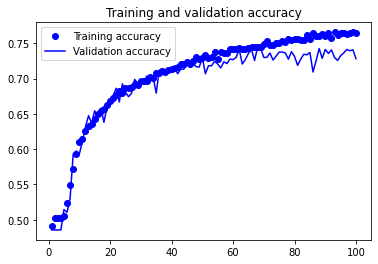

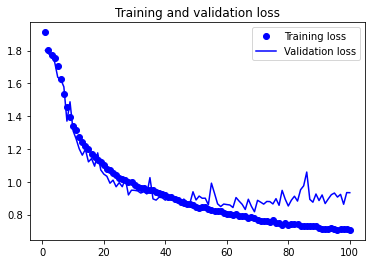

In [17]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [16]:
model_1.evaluate(validation_generator)

25/25 [==============================] - 1s 21ms/step - loss: 0.9332 - accuracy: 0.7281


[0.9331710338592529, 0.7281249761581421]

# Add Data Agumentation

In [18]:
batch_size = 64
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
datagen_validation=ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_dataframe(
    dataframe = train_df,
    directory = "/content/InfraredSolarModules/images/",
    x_col = "image_name",
    y_col = "anomaly_class",
    class_mode = "categorical",
    target_size = (image_height, image_width),
    batch_size = batch_size,
    color_mode = "grayscale"
)

validation_generator = datagen_train.flow_from_dataframe(
    dataframe = validation_df,
    directory = "/content/InfraredSolarModules/images/",
    x_col = "image_name",
    y_col = "anomaly_class",
    class_mode = "categorical",
    target_size = (image_height, image_width),
    batch_size = batch_size,
     color_mode = "grayscale"
)

Found 12800 validated image filenames belonging to 12 classes.
Found 1600 validated image filenames belonging to 12 classes.


In [19]:
batch_size = 64
image_height = 40
image_width = 24
num_train_images = 12800
num_valid_images = 1600
num_classes = 12

model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 1)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# this converts our 3D feature maps to 1D feature vectors
model_2.add(Flatten())  
model_2.add(Dense(64))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))



model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(1e-3),
              metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 38, 22, 32)        320       
                                                                 
 activation_5 (Activation)   (None, 38, 22, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 19, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 17, 9, 32)         9248      
                                                                 
 activation_6 (Activation)   (None, 17, 9, 32)         0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 4, 32)         0         
 2D)                                                  

In [20]:
history = model_2.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator
 )

Epoch 1/100
200/200 [==============================] - 6s 26ms/step - loss: 1.9176 - accuracy: 0.4940 - val_loss: 1.8273 - val_accuracy: 0.4856
Epoch 2/100
200/200 [==============================] - 5s 24ms/step - loss: 1.8057 - accuracy: 0.5026 - val_loss: 1.7873 - val_accuracy: 0.4856
Epoch 3/100
200/200 [==============================] - 5s 24ms/step - loss: 1.7755 - accuracy: 0.5026 - val_loss: 1.7987 - val_accuracy: 0.4856
Epoch 4/100
200/200 [==============================] - 5s 25ms/step - loss: 1.7541 - accuracy: 0.5026 - val_loss: 1.7282 - val_accuracy: 0.4856
Epoch 5/100
200/200 [==============================] - 5s 24ms/step - loss: 1.6982 - accuracy: 0.5074 - val_loss: 1.6591 - val_accuracy: 0.5063
Epoch 6/100
200/200 [==============================] - 5s 24ms/step - loss: 1.6418 - accuracy: 0.5216 - val_loss: 1.5999 - val_accuracy: 0.5163
Epoch 7/100
200/200 [==============================] - 5s 24ms/step - loss: 1.5813 - accuracy: 0.5326 - val_loss: 1.4865 - val_accuracy:

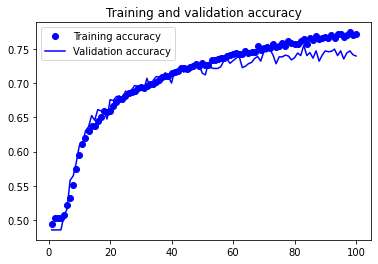

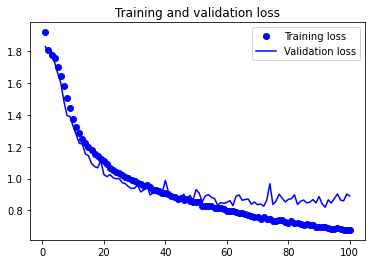

In [21]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [29]:
model_2.evaluate(validation_generator)

10/10 [==============================] - 0s 13ms/step - loss: 0.9490 - accuracy: 0.7183


[0.9490442872047424, 0.7183333039283752]